## Non-Hierarchical Clustering

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

### Load Dataset
Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

In [4]:
data = pd.read_csv('./dataset/Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni AnnualIncome dan SpendingScore.

Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

In [7]:
X = data [['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan StandardScaler.

In [8]:
X = StandardScaler().fit_transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

### Metode Elbow
Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau KElbowVisualizer pada Python.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

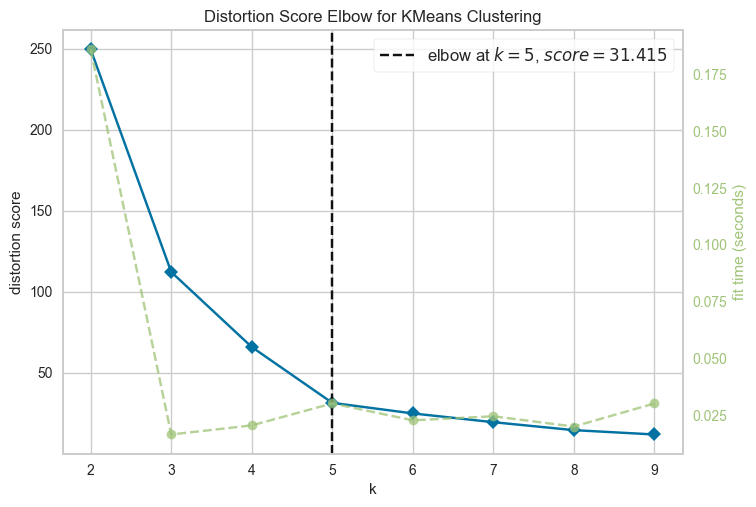

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

### Modeling
Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:

cluster bejumlah 5 (K=5)
random state bernilai 42
Random state berguna untuk mengontrol ke-random-an inisiasi centroid.

In [10]:
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

#training model
model_kmeans.fit(X)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [11]:
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1,
       0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3])

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method cluster_centers_.

In [12]:
print(model_kmeans.cluster_centers_)

[[-0.09894748 -1.20506271]
 [-0.11772005  0.91897759]
 [ 7.52694521 -0.11868539]
 [ 0.37342132  4.15876808]
 [-0.17079383 -0.15322869]]


### Evaluasi Model
Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:

    Melihat dendrogram
    Metode elbow
    Visualisasi data
    Silhouette Coefficient (SC)
Dendrogram digunakan pada model AHC. Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)
Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

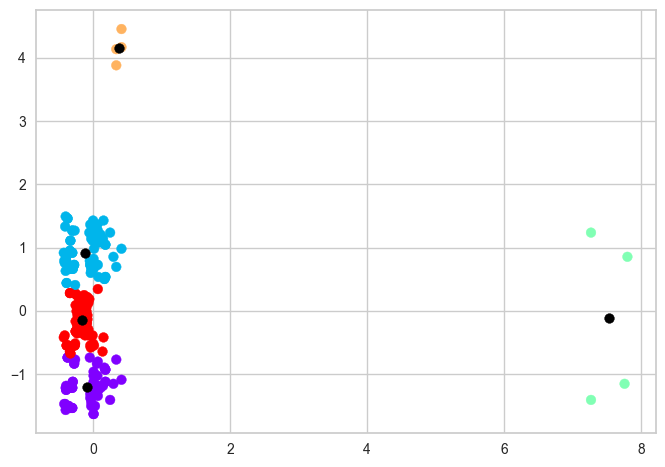

In [13]:
# Visualisasi hasil Clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], color='black')

Terlihat hasil clustering sudah cukup bagus.

Note:

    1.Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni AnnualIncome dan SpendingScore.
    2.Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
    3.Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
    4.Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

## Silhouette Coefficient
Kita bisa menggunakan silhouette_score untuk mendapat Silhouette Score model yang telah kita training.

In [14]:
SC_kmeans = silhouette_score(X, labels_kmeans,metric='euclidean')
print('silhouette score model K-means =', SC_kmeans)

silhouette score model K-means = 0.5726323363898457


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

### Kesimpulan
Simpan hasil clustering ke dalam dataset.

In [15]:
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,1
5,Female,31,17,40,4
...,...,...,...,...,...
209,Female,35,1207,79,2
210,Female,45,126,182,3
211,Male,32,126,174,3


Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

In [16]:
for i in range(jumlah_cluster):
    print(f'Cluster ke-{i}')
    print('Rata-rata pemasukkan customer    : ', data[data['Hasil_Clustering'] == i]['AnnualIncome'].mean())
    print('Rata-rata pengeluaran customer    : ', data[data['Hasil_Clustering'] == i]['SpendingScore'].mean())
    print()

Cluster ke-0
Rata-rata pemasukkan customer    :  63.12280701754386
Rata-rata pengeluaran customer    :  14.403508771929825

Cluster ke-1
Rata-rata pemasukkan customer    :  60.4054054054054
Rata-rata pengeluaran customer    :  81.06756756756756

Cluster ke-2
Rata-rata pemasukkan customer    :  1167.0
Rata-rata pengeluaran customer    :  48.5

Cluster ke-3
Rata-rata pemasukkan customer    :  131.5
Rata-rata pengeluaran customer    :  182.75

Cluster ke-4
Rata-rata pemasukkan customer    :  52.722772277227726
Rata-rata pengeluaran customer    :  47.415841584158414



Bisa kita simpulkan bahwa :

    Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
    Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
    Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
    Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
    Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)